### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Go through the data, check missing values and data types

In [211]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11

In [212]:
df.describe()

order_id      shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000

### Finding 1: 
> Based on the description above, the standard deviation (std = 41282.54) of this dataset is much greater than its mean (3145.13).  The max value of order_amount is 704,000 while the 50% percentile value (median) equals to 284. All of the above indicate that the order_amount values are highly skewed with the possiblity of having outliers.

### 2. Visualization of the order_amount column

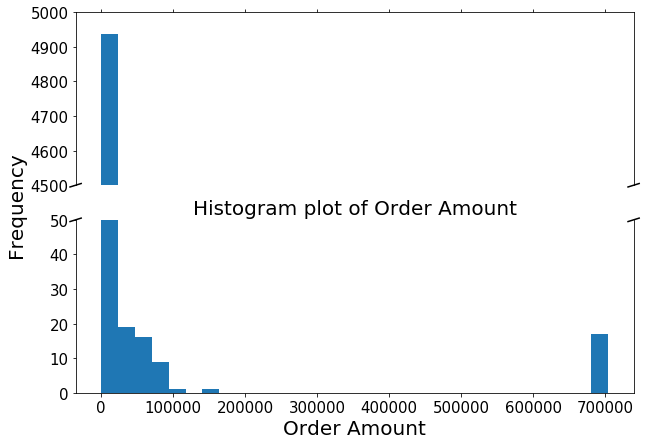

In [220]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (10,7))
ax1.hist(df['order_amount'], bins = 30)
ax2.hist(df['order_amount'], bins = 30)

ax1.set_ylim(4500, 5000) 
ax2.set_ylim(0, 50)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .010 
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

ax2.set_xlabel('Order Amount', fontsize = 20)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
f.text(0.03, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 20)
plt.title('Histogram plot of Order Amount')

plt.show()

Text(0.5, 1.0, 'Boxplot of Order Amount')

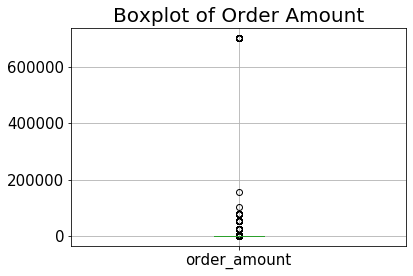

In [226]:
df.boxplot('order_amount', fontsize = 15)
plt.title('Boxplot of Order Amount')


In [198]:
df['order_amount'].median()

284.0

### Finding 2: 
> Both histogram and box plots above show that a few order_amount have much larger values than the rest of the values in the dataset.

### 3. Dig into the data

#### Create a new column named price_per_item to check the unit price

In [228]:
df['price_per_item'] =  df['order_amount']/df['total_items']
df.head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  price_per_item  
0  2017-03-13 12:36:56           112.0  
1  2017-03-03 17:38:52            90.0  
2   2017-03-14 4:23:56           144.0  
3  2017-03-26 12:43:37           156.0  
4   2017-03-01 4:35:11           156.0

#### Check the price_per_item for those large order_amount

In [229]:
df['price_per_item'].median()

153.0

In [293]:
# creat a new df grouped by shop_id and order_amount, and sorted to investigate the unusual transactions. 
df2 = pd.DataFrame (df.groupby(['shop_id', 'order_amount'])['price_per_item'].value_counts().sort_index(ascending = False))
df2 = df2.add_suffix('_count').reset_index()
df2.columns = ['shop_id','order_amount', 'price_per_item', 'order_count']
df2 =  df2.set_index('shop_id').sort_values(by = ['order_amount'], ascending = False)
df2.head(10)

order_amount  price_per_item  order_count
shop_id                                           
42             704000           352.0           17
78             154350         25725.0            1
78             102900         25725.0            1
78              77175         25725.0            9
78              51450         25725.0           16
78              25725         25725.0           19
42               1760           352.0            1
42               1408           352.0            2
43               1086           181.0            1
54               1064           133.0            1

In [243]:
df.loc[(df['shop_id']== 78) | (df['shop_id']== 42)].sort_values(by = ['shop_id','total_items'], ascending = False).head(20)                                                                                                    

order_id  shop_id  user_id  order_amount  total_items payment_method  \
691        692       78      878        154350            6          debit   
2492      2493       78      834        102900            4          debit   
1259      1260       78      775         77175            3    credit_card   
2564      2565       78      915         77175            3          debit   
2690      2691       78      962         77175            3          debit   
2906      2907       78      817         77175            3          debit   
3403      3404       78      928         77175            3          debit   
3724      3725       78      766         77175            3    credit_card   
4192      4193       78      787         77175            3    credit_card   
4420      4421       78      969         77175            3          debit   
4715      4716       78      818         77175            3          debit   
490        491       78      936         51450            2          debit   
493        494       78      983         51450            2           cash   
511        512       78      967         51450            2           cash   
617        618       78      760         51450            2           cash   
1529      1530       78      810         51450            2           cash   
2452      2453       78      709         51450            2           cash   
2495      2496       78      707         51450            2           cash   
2512      2513       78      935         51450            2          debit   
2818      2819       78      869         51450            2          debit   

               created_at  price_per_item  
691   2017-03-27 22:51:43         25725.0  
2492   2017-03-04 4:37:34         25725.0  
1259   2017-03-27 9:27:20         25725.0  
2564   2017-03-25 1:19:35         25725.0  
2690   2017-03-22 7:33:25         25725.0  
2906   2017-03-16 3:45:46         25725.0  
3403   2017-03-16 9:45:05         25725.0  
3724  2017-03-16 14:13:26         25725.0  
4192   2017-03-18 9:25:32         25725.0  
4420  2017-03-09 15:21:35         25725.0  
4715   2017-03-05 5:10:44         25725.0  
490   2017-03-26 17:08:19         25725.0  
493   2017-03-16 21:39:35         25725.0  
511    2017-03-09 7:23:14         25725.0  
617   2017-03-18 11:18:42         25725.0  
1529   2017-03-29 7:12:01         25725.0  
2452  2017-03-27 11:04:04         25725.0  
2495   2017-03-26 4:38:52         25725.0  
2512  2017-03-18 18:57:13         25725.0  
2818   2017-03-17 6:25:51         25725.0

In [304]:
df.loc[df['shop_id'] == 42].sort_values(by = ['total_items', 'created_at'],ascending = [False,True])

order_id  shop_id  user_id  order_amount  total_items payment_method  \
520        521       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
15          16       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
1364      1365       42      797          1760            5           cash   
1471      1472       42      907          1408            4          debit   
1367      1368       42      926          1408            4           cash   
2987      2988       42      819          1056            3           cash   
938        939       42      808          1056            3    credit_card   
3513      3514       42      726          1056            3          debit   
4421      4422       42      736           704            2    credit_card   
2491      2492       42      868           704            2          debit   
409        410       42      904           704            2    credit_card   
2766      2767       42      970           704            2    credit_card   
1911      1912       42      739           704            2           cash   
835        836       42      819           704            2           cash   
4767      4768       42      720           704            2    credit_card   
4326      4327       42      788           704            2          debit   
1520      1521       42      756           704            2          debit   
2609      2610       42      868           704            2          debit   
4294      4295       42      859           704            2           cash   
2003      2004       42      934           704            2           cash   
2273      2274       42      747           704            2          debit   
2018      2019       42      739           352            1          debit   
4231      4232       42      962           352            1           cash   
3998      3999       42      886           352            1          debit   
308        309       42      770           352            1    credit_card   
4625      4626       42      809           352            1    credit_card   
979        980       42      744           352            1          debit   
3903      3904       42      975           352            1          debit   
3697      3698       42      839           352            1          debit   
1929      1930       42      770           352            1    credit_card   
2053      2054       42      951           352            1          debit   
4745      4746       42      872           352            1          debit   
1512      1513       42      946           352            1          debit   
40          41       42      793           352            1    credit_card   
3651      3652       42      830           352            1    credit_card   
834        835       42     

>### Findind 3:
> Two shop_ids show much larger order_amount. 
1. The unit price at Shop_id 42 is 352, 2X higher than the average price across other shops. 17 orders were placed at 4:00:00am in March 2014 along with duplicated orders placed at the same timestamp on the same day,such as on 3/2/2014, 3/4/2014. The unit price needs to be investigated to see whether it was charged or entered incorrectly in the system. Meanwhile, the out of norm large order amounts and duplicate records needs to be confirmed with the shop on whether it's an automatic order by buyers or technical issue in the system. 
2. Shop_id 78 charges over 25k per order, which is certainly an abnormal price. We need to investigate whether the price  misses the right decimal points or is using a different currency in the system.

### Question a: Think about what could be going wrong with our calculation

> Answer: Based on the three findings above, the order_amount variable contains some extraneous values associated with either extremely large unit price or strange purchase pattern. Calculate the AOV without looking at the distribution of the data or considering outliers lead to false conclusion.  

#### Check how much percentile do those extraneous values take in the dataframe

In [163]:
for i in np.linspace (98, 100, 9):
    q = i/100
    print(f"{i} percentile of price_per_item is: {df['price_per_item'].quantile(q=q)}")

98.0 percentile of price_per_item is: 201.0
98.25 percentile of price_per_item is: 352.0
98.5 percentile of price_per_item is: 352.0
98.75 percentile of price_per_item is: 352.0
99.0 percentile of price_per_item is: 352.0
99.25 percentile of price_per_item is: 25725.0
99.5 percentile of price_per_item is: 25725.0
99.75 percentile of price_per_item is: 25725.0
100.0 percentile of price_per_item is: 25725.0


### Question b: Think about a better way to evaluate this data
> Answer: The extraneous values are composed of ~1.75 % of the total amount of data. The better option is to drop these columns containing extraneous values when calculating the mean (AOV). Another option is to use the median value instead of mean to estimate the average order value as the median already takes the outliers into the consideration.

In [202]:
# new dataframe without outliers
df = df.loc[df['price_per_item']<=201]
df.groupby(['order_amount', 'shop_id'])['price_per_item'].value_counts().sort_index(ascending = False).head(10)

order_amount  shop_id  price_per_item
1086          43       181.0             1
1064          54       133.0             1
980           89       196.0             1
965           50       193.0             1
960           91       160.0             1
              13       160.0             1
948           61       158.0             1
935           51       187.0             1
              6        187.0             2
920           11       184.0             1
Name: price_per_item, dtype: int64

In [203]:
df.describe()

order_id      shop_id      user_id  order_amount  total_items  \
count  4903.000000  4903.000000  4903.000000   4903.000000  4903.000000   
mean   2499.584540    49.900877   849.858862    300.155823     1.995717   
std    1444.221163    29.154367    86.887947    155.941112     0.982602   
min       1.000000     1.000000   700.000000     90.000000     1.000000   
25%    1246.500000    24.000000   776.000000    163.000000     1.000000   
50%    2499.000000    50.000000   850.000000    284.000000     2.000000   
75%    3750.500000    74.000000   925.000000    386.500000     3.000000   
max    5000.000000   100.000000   999.000000   1086.000000     8.000000   

       price_per_item  
count     4903.000000  
mean       150.400163  
std         23.851202  
min         90.000000  
25%        132.000000  
50%        153.000000  
75%        166.000000  
max        201.000000

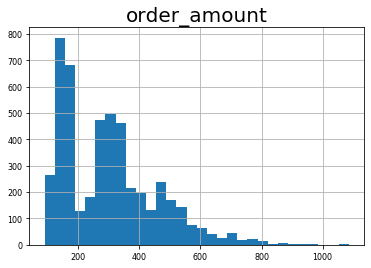

In [205]:
df.hist('order_amount', bins = 30)
plt.show()

### Question c,d: What metric would you report for this dataset? What is its value?

> Based on the information above, after removing the extraneous values, the median value remains the same and the mean value becomes more representative of the population. The average order value (AOV) from the cleaned dataset is 300.16, which is close to the median 284.0.Thus, I will either report on the median value or the mean value after removing the outliers. 

## Question 2: 

For this question youâ€™ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
